<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Portfolio_Optimization_Fronti%C3%A8re_Efficiente16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimisation de Portefeuille avec la Frontière Efficiente**
## **Introduction:**

Dans cet exercice, nous allons construire et optimiser un portefeuille en utilisant la théorie moderne du portefeuille (MPT) et la frontière efficiente. Nous utiliserons les actions des FAANG (Facebook, Amazon, Apple, Netflix, Google) pour créer des portefeuilles optimaux pour différents niveaux de risque.

[*********************100%%**********************]  5 of 5 completed


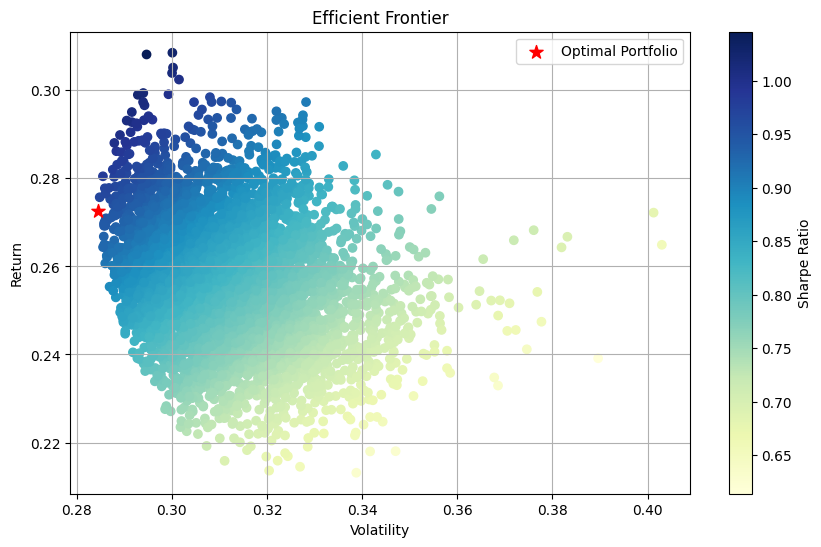

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Liste des symboles FAANG
tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']

# Télécharger les données de prix
data = yf.download(tickers, period='5y', interval='1d')['Close']

# Calculer les rendements quotidiens
returns = data.pct_change().dropna()

# Calculer les rendements annuels moyens et la matrice de covariance annuelle
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Fonction pour calculer le rendement et la volatilité du portefeuille
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Fonction pour minimiser la volatilité
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Contrainte que la somme des poids soit égale à 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Limites des poids (entre 0 et 1)
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Résoudre pour minimiser la volatilité
initial_weights = np.array([1./len(tickers) for _ in range(len(tickers))])
opt_weights = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints).x

# Calculer les performances du portefeuille optimal
opt_returns, opt_volatility = portfolio_performance(opt_weights, mean_returns, cov_matrix)

# Générer des portefeuilles aléatoires pour tracer la frontière efficiente
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]

# Tracer la frontière efficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(opt_volatility, opt_returns, marker='*', color='r', s=100, label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


# **Conclusion:**

En observant cette frontière efficiente, nous pouvons voir comment optimiser un portefeuille de plusieurs actions pour obtenir le meilleur rendement pour un niveau de risque donné. Cette analyse peut aider les investisseurs à construire des portefeuilles plus efficaces et à maximiser leurs rendements ajustés au risque.